<a href="https://colab.research.google.com/github/Manjuphoenix/COVID19-Chest-X-ray-detection/blob/master/Copy_of_Copy_of_neural_nets_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hello there

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

import torch
import torchvision

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [2]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

!pip install kaggle

from google.colab import files 
files.upload()

#Make a directory named kaggle and copy the kaggle.json file there; and change its permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#imagenet_data = torchvision.datasets.ImageNet('https://kaggle.com/saroz014/plant-diseases')
#data_loader = torch.utils.data.DataLoader(imagenet_data, batch_size=4, shuffle=True, num_workers=args.nThreads)

#choose location of kaggle.json
#C:\Users\micht\.kaggle

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d saroz014/plant-diseases

100% 6.37G/6.39G [01:00<00:00, 227MB/s]
100% 6.39G/6.39G [01:00<00:00, 114MB/s]


In [4]:
from zipfile import ZipFile
file_name = 'plant-diseases.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  #zip.printdir()
  print(zip.extractall())
  #zip.close()
  print('Done')

None
Done


In [5]:
#'dataset_itr2\train\Tomato__Septoria_leaf_spot'
#dataset is in a folder, not a file... so im not sure how to handle this
# print(file)

In [6]:
# call extract() method to extract any file by specifying its path in the zip file. #e.g.
# zip.extract('python_files/python_wiki.txt')

#If you want to read some specific file, :
# data = zip.read(name_of_file_to_read)

In [7]:
#to unzip data:
! unzip plant-diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___health

In [8]:
import os
from torch import utils
import shutil

!mkdir /content/dataset
!mkdir /content/dataset/TrainFolder
!mkdir /content/dataset/TestFolder

dir_path = '/content/dataset_itr2/test'
cl = os.listdir(dir_path)
print(cl)
unique_plants = []
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

#What I wanna do here, is seperate the data based on their unique classes
#Creating Directories in another folder to avoid confusion, so mypath is like the target path:
my_path = '/content/dataset/TestFolder'
for u in unique_plants:
    new_dir = my_path + '/' + u
    if os.path.isdir(new_dir) == False:
        os.mkdir(new_dir)
        print(new_dir + ' -> Directory created')

#moving data into them
new_dirs = os.listdir(my_path)
#Note : cl holds the original directories as segregated by disease
for i in cl:
    x = i.split('_')
    for d in new_dirs:
        if x[0] == d:
            #check if folder already exists  
            target = my_path + '/' + d
            if os.path.isdir(target) == True:
                shutil.move(dir_path + '/' + i, target)

['Strawberry___Leaf_scorch', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Grape___Black_rot', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Raspberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Apple_scab', 'Soybean___healthy', 'Potato___healthy', 'Blueberry___healthy', 'Corn_(maize)___Cercospora_leaf_spot G

In [9]:
import os
from torch import utils
import shutil

dir_path = '/content/dataset_itr2/train'
cl = os.listdir(dir_path)
print(cl)
unique_plants = []
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

#What I wanna do here, is seperate the data based on their unique classes
#Creating Directories in another folder to avoid confusion, so mypath is like the target path:
my_path = '/content/dataset/TrainFolder'
for u in unique_plants:
    new_dir = my_path + '/' + u
    if os.path.isdir(new_dir) == False:
        os.mkdir(new_dir)
        print(new_dir + ' -> Directory created')

#moving data into them
new_dirs = os.listdir(my_path)
#Note : cl holds the original directories as segregated by disease
for i in cl:
    x = i.split('_')
    for d in new_dirs:
        if x[0] == d:
            #check if folder already exists  
            target = my_path + '/' + d
            if os.path.isdir(target) == True:
                shutil.move(dir_path + '/' + i, target)

['Strawberry___Leaf_scorch', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Grape___Black_rot', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Raspberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Apple_scab', 'Soybean___healthy', 'Potato___healthy', 'Blueberry___healthy', 'Corn_(maize)___Cercospora_leaf_spot G

In [10]:
# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from __future__ import print_function, division

import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


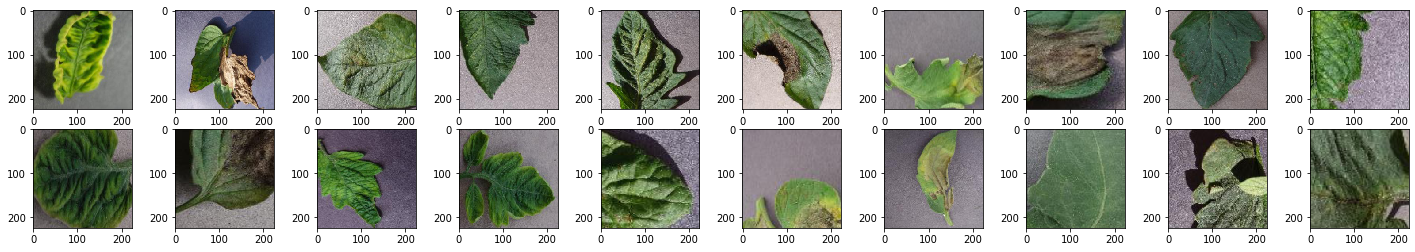

In [11]:
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         [0.485, 0.456,0.406],
#         [0.229, 0.224, 0.225])])

# test_transforms = transforms.Compose([
#     transforms.Resize(224),
#     transforms.CenterCrop(256),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         [0.485, 0.456, 0.406],
#         [0.229, 0.224, 0.225])])

data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])


train_set = torchvision.datasets.ImageFolder('dataset/TrainFolder/Tomato', transform=data_transform)
test_set = torchvision.datasets.ImageFolder('dataset/TestFolder/Tomato', transform=data_transform)


train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

labels = train_set.classes

print(labels)

# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1,)
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
VGG_types = {
    "VGG16": [
        64,
        64,
        "M",
        128,
        128,
        "M",
        256,
        256,
        256,
        "M",
        512,
        512,
        512,
        "M",
        512,
        512,
        512,
        "M",
    ],}

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv_layers = self.create_conv_layers(VGG_types['VGG16'])
        # self.layer1 = nn.Sequential(
        #     nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1),
        #     nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1),
        #     nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1),
        #     nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1),
        #     nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1))
        self.layer2 = nn.AdaptiveAvgPool2d(output_size=(7,7))
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=25088, out_features=4096, bias=True),
            nn.ReLU(),
                nn.Dropout(p=0.5),
                nn.Linear(in_features=4096, out_features=4096, bias=True),
                nn.ReLU(),
                nn.Dropout(p=0.5),
                nn.Linear(in_features=4096, out_features=10, bias=True),
            )

    def forward(self, x):
      x = self.conv_layers(x)
        # out = self.layer1(x)
      out = self.layer2(x)
      out = self.layer3(out)
      return out
    def create_conv_layers(self,architecture):
      layers = []
      in_channels = self.in_channels
      for layer in architecture : 
          if type(layer) is int: 
              out_channels = layer
              layers += [nn.Conv2d(in_channels = in_channels,out_channels = out_channels, 
                                   kernel_size = (3,3), stride = (1,1), padding = (1,1)),
                                   nn.BatchNorm2d(layer),
                                   nn.ReLU()]
              in_channels = layer #for the next itteration
          elif layer == 'M': 
              layers += [nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))]
      return nn.Sequential(*layers,  )

model_ft = NeuralNetwork()


model_ft = model_ft.cuda()

import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(model_ft.parameters(), lr=0.001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

AttributeError: ignored

In [ ]:
# number of epochs to train the model
n_epochs = 2

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # model by default is set to train
    for batch_i, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_ft(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model_ft.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456,0.406],
        [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225])])

train_set = torchvision.datasets.ImageFolder('TrainFolder/Tomato', transform=train_transforms)
test_set = torchvision.datasets.ImageFolder('TestFolder/Tomato', transform=test_transforms)

print(test_set.classes)
print(train_set.classes)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)

print(test_loader)
test_images, test_labels = next(iter(test_loader))
train_images, train_labels = next(iter(train_loader))
print(test_labels)
print(train_labels)

NameError: ignored

In [ ]:
# check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Dataset ImageFolder
    Number of datapoints: 14512
    Root location: TestFolder/Tomato


In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()
pred = model(train_set, train_label)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


NameError: ignored

In [ ]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)